In [19]:
import pdb

In [1]:
#Import Packages

import pandas as pd
import numpy as np

In [10]:
#Load Data from CSV

dfload = pd.read_csv('data/stats.csv')
dfload = sort_columns_type(dfload)
dfload;

In [11]:
#Remove players who have played less than 100 games

dfload = dfload.query("g> 100")

In [12]:
#Shane's list for style

shanelist = ['name', 'season', 'team_id', 'pos', 'pf_per_poss',
'mp_per_g',
'pct_fg2_dunk',
'fg3a_pct_fga',
'blk_pct',
'stl_pct',
'usg_pct',
'fta_per_poss',
'orb_pct',
'ast_pct',
'tov_pct',
'fg2_pct_ast',
'fg3_pct_ast',
'fg3_pct',
'fg3a_per_fga_pct',
'fg2a_pct_fga',
'fta_per_fga_pct',
'fg_pct_00_03',
'fg_pct_03_10',
'fg_pct_10_16',
'fg_pct_16_xx',
'pct_fg3a_corner',
'pct_fga_00_03',
'pct_fga_03_10',
'pct_fga_10_16',
'pct_fga_16_xx',
'fg3_pct_corner']

df = dfload[shanelist]

In [15]:
#Fill in null values

df = df.fillna(float(1.0))

# Functions Below

In [3]:
def is_zero(df):
    a = df
    b = []
    for i in df.columns:
        lit = i + " == 0.0"
        b.append((i, a.query(lit)))
    #print out list  
    for j in b:
        print (j[0], (j[1].shape)[0])

#### [pandas <----> numpy] functions 

''' For the following functions, "df" is a pandas data frame.
    Function "return_data_mat" turns the data frame into numpy array with player name column removed.
    Function "return_names" returns the names column of the players.'''

def return_data_mat(df):
    vals = df.values
    trimvals = delete_nonquant_cols(vals)
    data_mat = trimvals.astype(float)
    return data_mat

def return_names(df):
    names = np.array(df['name']).astype(str)
    return names

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

#### pandas functions

def sort_columns_type(df):
   
    #get idx for string columns
    vals = df.values
    idx = get_idx_str_cols(vals)
    
    #get column list and sort it    
    cols = (df.columns).tolist()
    str_cols = [cols[i] for i in idx]
 
    for x in str_cols:
        cols.remove(x)
    cols = str_cols + cols
    
    # sort new data frame based on new column ordering
    newdf = df[cols]
    return newdf

def get_idx_str_cols(arr):
    
    #get indicies of non-quantitative columns
    idxlist = []
    m, n = arr.shape
    for i in range(m):
        for j in range(n):
            if (type(arr[i,j]) == str):
                idxlist.append(j)
    idxset = set(idxlist)
    idx = list(idxset)
    idx.sort()
    return idx

def delete_nonquant_cols(arr):
    
    m, n = arr.shape
    idx = get_idx_str_cols(arr)
        
    #create a mask with a "False" for each column not desired       
    mask = np.ones(n, dtype=bool)
    mask[idx] = False
    
    #index through arr with the mask
    result = arr[:,mask]
    
    #testing that only numbers remain
    a, b = result.shape
    for i in range(a):
        for j in range(b):
            g = type(result[i,j])
            assert (g is float or g is long or g is int or g is complex) 
    
    return result

In [48]:
#Get the Data and the Labels (random, here)

from numpy import random
from numpy.random import randint as paco

X = (df.values[:,4:] + np.ones(((df.values[:,4:]).shape[0],(df.values[:,4:]).shape[1]))).astype(float)
y = (paco(0, 10, size=(df.shape[0], 1))).astype(float)


 For the following functions, "df" is a pandas data frame.
    Function "return_data_mat" turns the data frame into numpy array with player name column removed.
    Function "return_names" returns the names column of the players.
Computing random projection
Computing PCA projection
Computing Linear Discriminant Analysis projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 1.98541e-05
Computing modified LLE embedding
Done. Reconstruction error: 1.30998
Computing MDS embedding
Done. Stress: 555085.683734
Computing Totally Random Trees embedding
Computing Spectral embedding
Computing t-SNE embedding


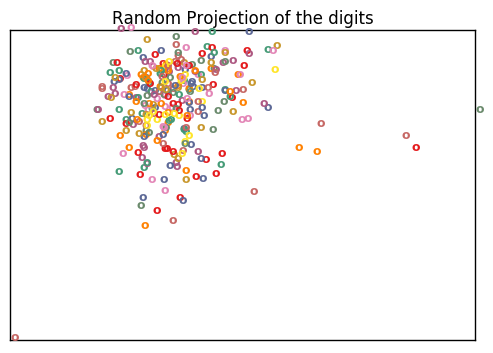

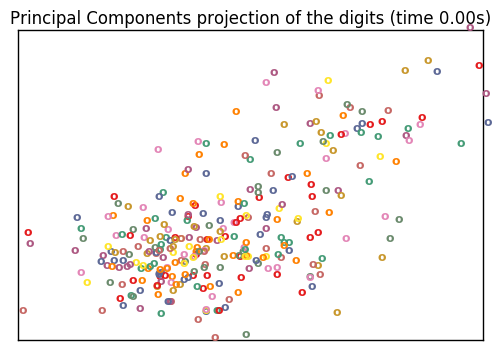

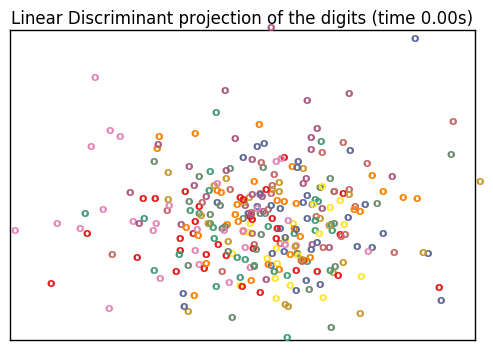

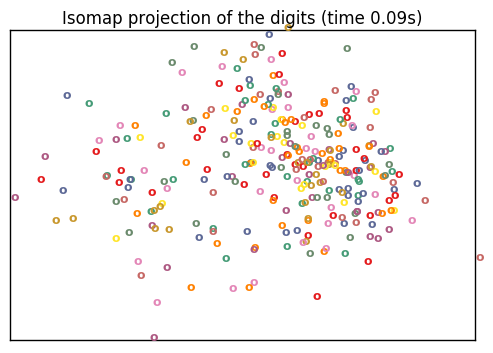

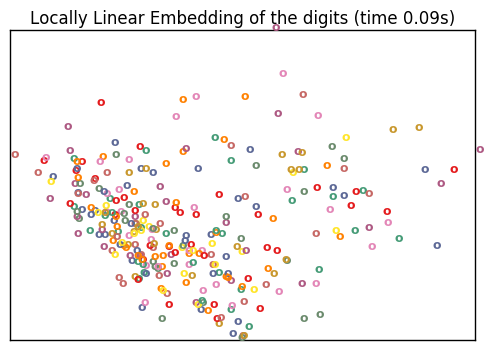

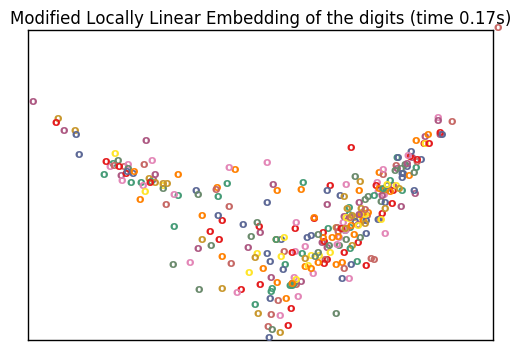

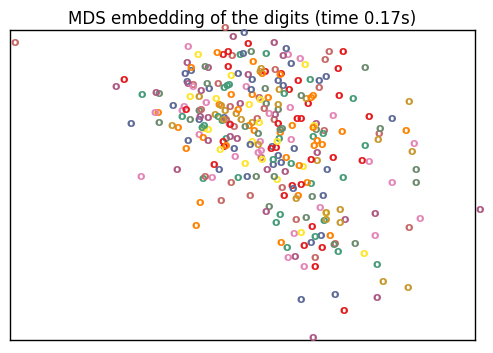

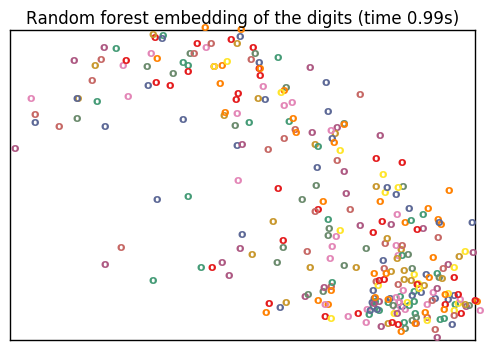

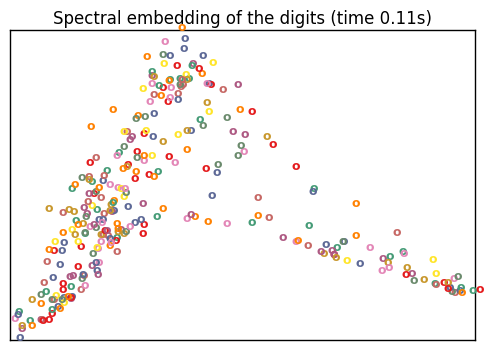

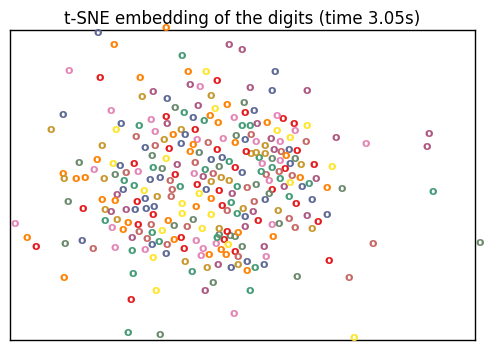

In [41]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], 'o',
                 color=plt.cm.Set1(y[i,0] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(digits.data.shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# Plot images of the digits
# n_img_per_row = 20
# img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
# for i in range(n_img_per_row):
#     ix = 10 * i + 1
#     for j in range(n_img_per_row):
#         iy = 10 * j + 1
#         img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

# plt.imshow(img, cmap=plt.cm.binary)
# plt.xticks([])
# plt.yticks([])
# plt.title('A selection from the 64-dimensional digits dataset')


#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# # HLLE embedding of the digits dataset
# print("Computing Hessian LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='hessian')
# t0 = time()
# X_hlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_hlle,
#                "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# # LTSA embedding of the digits dataset
# print("Computing LTSA embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='ltsa')
# t0 = time()
# X_ltsa = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_ltsa,
#                "Local Tangent Space Alignment of the digits (time %.2fs)" %
#                (time() - t0))

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()